## 1. Article level

In the file each article is seperated by 'NEW_PAPER' in 'covid-scienc.txt' and 'NEW NEWSPAPER' in 
'covid-non-science'.

In [1]:
#import
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as s
import dataframe_image as dfi
import networkx as nx
import mantel

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### covid-science.txt

In [2]:
def load_data(path,file_name,seperator):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r", encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            i=i+1
            if text !='':
                document = document+text
                if text == seperator:
                    documents_list.append(document)
                    document = ''
        documents_list.append(document)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [3]:
document_list,titles,word_count_science=load_data("","covid-science-large.txt",'NEW_PAPER')

Number of words in text file : 274941
Total Number of Documents: 40


In [4]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        tokens = [i for i in tokens if len(i)>4]
        print(tokens)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [5]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnetmethodology', 'predicting', 'covid', '19based', 'chest', 'imagess', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herreraabstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'orchest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'mostmedical', 'centers', 'hence', 'cases', 'imagesbecome', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networkshave', 'great', 'potential', 'building', 'covid', 'triage', 'systemsand', 'detecting', 'covid', 'patients', 'especially', 'patients', 'withlow', 'severity', 'unfortunately', 'current', 'databases', 'allowbuilding', 'systems', 'highly', 'heterogeneousand', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensit

In [6]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [7]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    #print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [8]:
# LSA Model
number_of_topics=25
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [9]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_articles = create_gensim_lsa_model(clean_text,number_of_topics,words)

In [10]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.5580672321131082,
 'imag': 0.28285701783582096,
 'model': 0.257499828486704,
 'dataset': 0.14256248905605798,
 'infect': 0.1393504156387031}

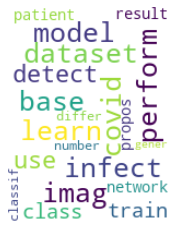

In [11]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph21.png')

In [12]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled24.png')

cosine-similarity
             covid       imag      model    dataset     infect
covid            1  0.0792291  0.0523905 -0.0570346  0.0548166
imag     0.0792291          1 -0.0709453   0.184574 -0.0203597
model    0.0523905 -0.0709453          1  0.0116004   0.103497
dataset -0.0570346   0.184574  0.0116004          1  -0.181223
infect   0.0548166 -0.0203597   0.103497  -0.181223          1


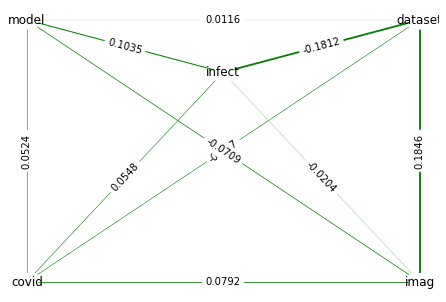

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig24.png')

### covid-psychology-large.txt

In [14]:
document_list,titles,word_count_psy=load_data("","covid-psychology-large.txt",'NEW PAPER')

Number of words in text file : 183592
Total Number of Documents: 40


In [15]:
clean_text=preprocess_data(document_list)

['international', 'sociology2021', 'author', '2020article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissionsdoi', '0268580920948807journals', 'sagepub', 'isspsychology', 'politics', 'ofcovid', 'misinfodemics', 'peoplebelieve', 'misinfodemics', 'sonia', 'mukhtaruniversity', 'management', 'technology', 'lahore', 'pakistanabstractmisinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adversehealth', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicateevidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'ofmisinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevierabout', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'thisreview', 'examines', 'mechanisms', 'operational', 'structure', 'prevalence', 'pr

In [16]:
# LSA Model
number_of_topics=25
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))#dict and encoding matrix values


In [17]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_articles=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [18]:
dict(model_psy.show_topic(0,topn=5))

{'student': 0.31520975301892173,
 'psycholog': 0.30882252103232993,
 'covid': 0.3082634599864964,
 'train': 0.22330563399536105,
 'pandem': 0.21884380058036254}

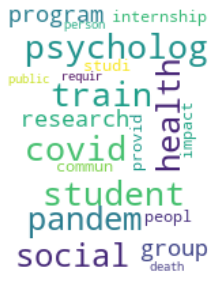

In [19]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph22.png')

In [20]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psy =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psy,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled25.png')

cosine-similarity
             student  psycholog      covid      train    pandem
student            1  0.0579216  0.0411114   0.105376  0.064141
psycholog  0.0579216          1   0.157892   0.152138  0.166166
covid      0.0411114   0.157892          1 -0.0037664  0.284789
train       0.105376   0.152138 -0.0037664          1  0.227891
pandem      0.064141   0.166166   0.284789   0.227891         1


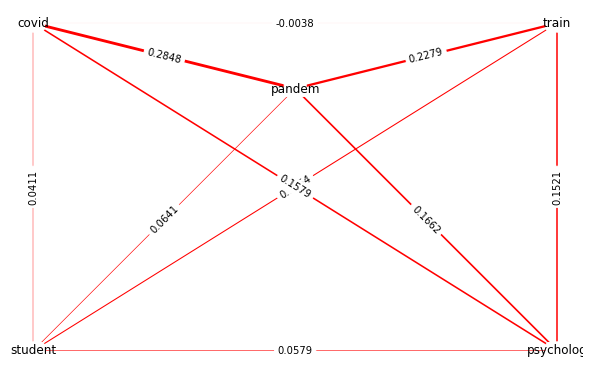

In [21]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig25.png')

In [22]:
def mantel_test():
    words_science = dict(model_science.show_topic(0, topn=word_count_science))
    words_psy = dict(model_psy.show_topic(0, topn=word_count_psy))

    top_words_science = dict(model_science.show_topic(0, topn=5)) 
    top_words_psy = dict(model_psy.show_topic(0,topn=5)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_psy[key]
        except KeyError:
            c[key] = 0

    top_words_psy.update(c)

    b={} #non law words in law
    for key in top_words_psy:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_science.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_psy =dict(model_psy.show_topic(i, topn=word_count_psy))
        b=pd.DataFrame(words_from_psy,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_psy.keys()), 
                      index = list(top_words_psy.keys()))

    l = list(top_words_psy.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_psy), k = 1)])

    return mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [23]:
mantel_test()

Pairwise-distance
               student psycholog     covid        train       pandem  \
student    1.82501e-08  0.564954  0.959938     0.684611     0.655788   
psycholog     0.564954         0  0.759377     0.339034     0.292811   
covid         0.959938  0.759377         0     0.743561     0.732311   
train         0.684611  0.339034  0.743561  7.45058e-09     0.473517   
pandem        0.655788  0.292811  0.732311     0.473517  5.26836e-09   
imag          0.993492  0.822393     1.074     0.757535     0.894178   
model         0.984149  0.802488   1.07483     0.840095     0.824912   
dataset       0.865144  0.648478   1.02522     0.763281     0.728341   
infect        0.905273  0.673654  0.986761     0.702399     0.725434   

                  imag        model   dataset       infect  
student       0.993492     0.984149  0.865144     0.905273  
psycholog     0.822393     0.802488  0.648478     0.673654  
covid            1.074      1.07483   1.02522     0.986761  
train         0.7

(-0.4004170743670773, 0.8806, -1.2080411984752502)

## 2. 2-3 paragraphs

### covid-science.txt

In [24]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    document = ''
    i=0
    with open( os.path.join(path, file_name) ,"r",encoding="utf8") as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for word in words:
                i=i+1
                document = document+word+' '
                if i == 200:
                    documents_list.append(document)
                    document,i = '',0
                    if len(documents_list) == 2:
                        break
    print("Total Number of Documents:",len(documents_list))
    #titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [25]:
document_list,titles,word_count_science=load_data("","covid-science-large.txt")

Number of words in text file : 274941
Total Number of Documents: 2


In [26]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet', 'methodology', 'predicting', 'covid', 'based', 'chest', 'images', 'tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte', 'guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova', 'olmedo', 'sánchez', 'herrera', 'abstract', 'currently', 'coronavirus', 'disease', 'covid', 'infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans', 'chest', 'images', 'computed', 'tomography', 'scanners', 'testing', 'available', 'medical', 'centers', 'hence', 'cases', 'images', 'become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks', 'great', 'potential', 'building', 'covid', 'triage', 'systems', 'detecting', 'covid', 'patients', 'especially', 'patients', 'severity', 'unfortunately', 'current', 'databases', 'allow', 'building', 'systems', 'highly', 'heterogeneous', 'biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sensitivities', 'ach

In [27]:
# LSA Model
number_of_topics=2
words_nscience=len(clean_text[0])+len(clean_text[1])
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words_nscience)
words_science =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [28]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_p=create_gensim_lsa_model(clean_text,number_of_topics,words_nscience)

In [29]:
words_nscience

238

In [30]:
dict(model_science.show_topic(0, topn=5))

{'support': -0.32899471788278895,
 'granada': -0.24814037209037268,
 'covid': -0.22769581399154332,
 'programm': -0.21932981192185946,
 'research': -0.21932981192185946}

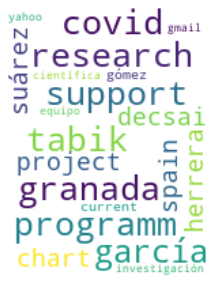

In [31]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph23.png')

In [32]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model_science.show_topic(i, topn = words_nscience))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled26.png')

cosine-similarity
            support   granada      covid   programm   research
support           1  0.956969 -0.0794645          1          1
granada    0.956969         1   0.213226   0.956969   0.956969
covid    -0.0794645  0.213226          1 -0.0794645 -0.0794645
programm          1  0.956969 -0.0794645          1          1
research          1  0.956969 -0.0794645          1          1


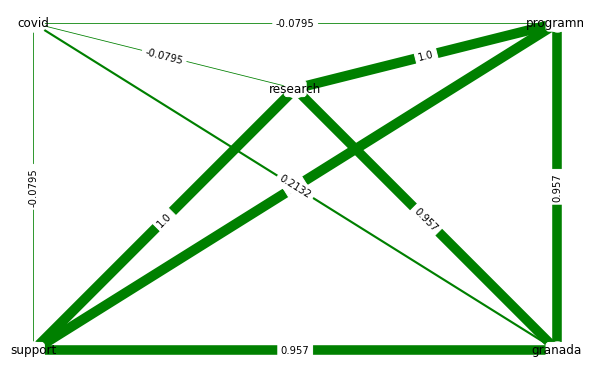

In [33]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig26.png')

### covid-psycology.txt

In [34]:
document_list,titles,word_count_psy=load_data("","covid-psychology-large.txt")

Number of words in text file : 183592
Total Number of Documents: 2


In [35]:
clean_text=preprocess_data(document_list)

['international', 'sociology', 'author', 'article', 'reuse', 'guidelines', 'sagepub', 'journals', 'permissions', '0268580920948807', 'journals', 'sagepub', 'psychology', 'politics', 'covid', 'misinfodemics', 'people', 'believe', 'misinfodemics', 'sonia', 'mukhtar', 'university', 'management', 'technology', 'lahore', 'pakistan', 'abstract', 'misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse', 'health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate', 'evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects', 'misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier', 'about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article', 'review', 'examines', 'mechanisms', 'operational', 'structure', 'preval

In [36]:
# LSA Model
number_of_topics=2
words_npsy=len(clean_text[0])+len(clean_text[1])
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words_npsy)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [37]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_p = create_gensim_lsa_model(clean_text,number_of_topics,words_npsy)

In [38]:
dict(model_psy.show_topic(0, topn=5))

{'misinfodem': 0.5033743541941372,
 'covid': 0.3629711503323515,
 'articl': 0.2145925193519742,
 'health': 0.14837863098037707,
 'mechan': 0.148378630980377}

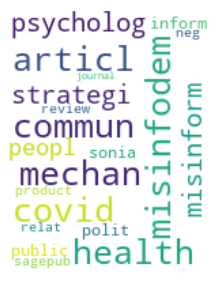

In [39]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph24.png')

In [40]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psy =dict(model_psy.show_topic(i, topn=words_npsy))
    b=pd.DataFrame(words_psy,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled27.png')

cosine-similarity
           misinfodem     covid    articl    health    mechan
misinfodem          1  0.976353  0.993795  0.755596  0.755596
covid        0.976353         1  0.946251  0.879335  0.879335
articl       0.993795  0.946251         1  0.678051  0.678051
health       0.755596  0.879335  0.678051         1         1
mechan       0.755596  0.879335  0.678051         1         1


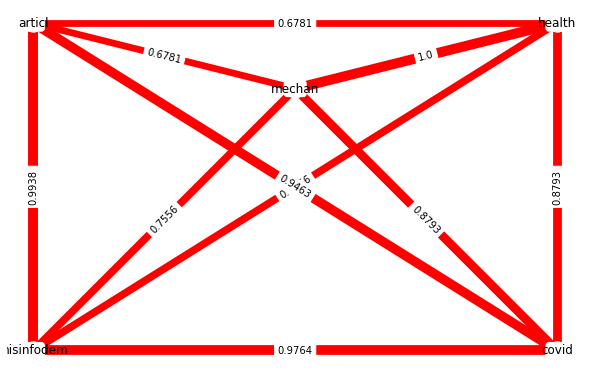

In [41]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *10  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='r',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig27.png')

In [42]:
mantel_test()

Pairwise-distance
           misinfodem     covid    articl health mechan   support    granada  \
misinfodem          0         0         0      0      0         0          0   
covid               0         0  0.378443      0      0  0.628979    0.47364   
articl              0  0.378443         0      0      0  0.423546   0.266413   
health              0         0         0      0      0         0          0   
mechan              0         0         0      0      0         0          0   
support             0  0.628979  0.423546      0      0         0   0.168269   
granada             0   0.47364  0.266413      0      0  0.168269          0   
programm            0  0.545218  0.293443      0      0  0.133207  0.0775087   
research            0  0.545218  0.293443      0      0  0.133207  0.0775087   

               programm     research  
misinfodem            0            0  
covid          0.545218     0.545218  
articl         0.293443     0.293443  
health                0  

(-0.12443276865025549, 0.6534, -0.5045188864827789)

## Paragraph level

### covid-science.txt

In [43]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r",encoding='UTF8') as fin:
        data = fin.read()
        words = data.split()
        fin.seek(0)
        print('Number of words in text file :', len(words))
        for line in fin.readlines():
            text = line.strip()
            if text !='':
                documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles,len(words)

In [44]:
document_list,titles,word_count_science=load_data("","covid-science-large.txt")

Number of words in text file : 274941
Total Number of Documents: 31577


In [45]:
clean_text=preprocess_data(document_list)

['covidgr', 'dataset', 'covid', 'sdnet']
['methodology', 'predicting', 'covid']
['based', 'chest', 'images']
['tabik', 'gómez', 'martín', 'rodríguez', 'sevillano', 'garcía', 'charte']
['guirado', 'suárez', 'luengo', 'valero', 'gonzález', 'garcía', 'villanova']
['olmedo', 'sánchez', 'herrera']
['abstract', 'currently', 'coronavirus', 'disease', 'covid']
['infectious', 'diseases', 'century', 'diagnosed', 'using', 'testing', 'scans']
['chest', 'images', 'computed', 'tomography']
['scanners', 'testing', 'available']
['medical', 'centers', 'hence', 'cases', 'images']
['become', 'effective', 'assisting', 'clinicians', 'making', 'decisions', 'learning', 'neural', 'networks']
['great', 'potential', 'building', 'covid', 'triage', 'systems']
['detecting', 'covid', 'patients', 'especially', 'patients']
['severity', 'unfortunately', 'current', 'databases', 'allow']
['building', 'systems', 'highly', 'heterogeneous']
['biased', 'towards', 'severe', 'cases', 'article', 'threefold', 'demystify', 'sens

In [46]:
# LSA Model
number_of_topics=100
words=word_count_science
model_science=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_law =dict(model_science.show_topic(0, topn=words))##dict and encoding matrix values

In [47]:
#These variables are for further experimentation in vertical comparission mantel test
model_science_paragraph=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [48]:
dict(model_science.show_topic(0, topn=5))

{'covid': 0.8739430533291538,
 'imag': 0.23961667670904405,
 'model': 0.17341447628404277,
 'detect': 0.14728983226024814,
 'volum': 0.09165186646350945}

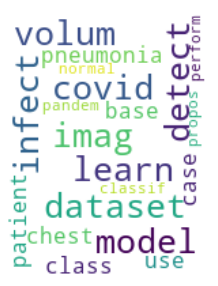

In [49]:
from wordcloud import WordCloud
text = dict(model_science.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph25.png')

In [50]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_science =dict(model_science.show_topic(i, topn=words))
    b=pd.DataFrame(words_science,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_science.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled28.png')

cosine-similarity
              covid         imag        model       detect       volum
covid             1  0.000552708  0.000259788   0.00362402  0.00592116
imag    0.000552708            1  0.000658601 -0.000913103  0.00143612
model   0.000259788  0.000658601            1  -0.00160858 -0.00424804
detect   0.00362402 -0.000913103  -0.00160858            1   0.0199593
volum    0.00592116   0.00143612  -0.00424804    0.0199593           1


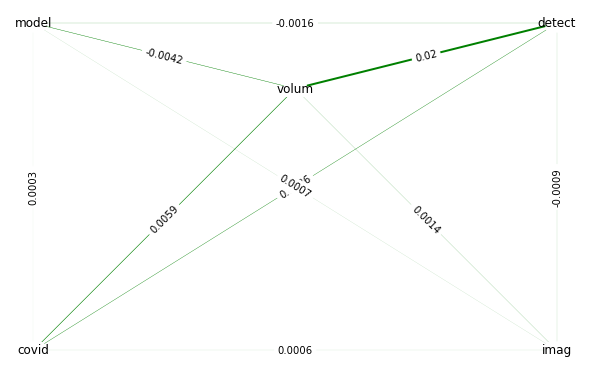

In [51]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *100  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='green',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig28.png')

### covid-psychology-large.txt

In [52]:
document_list,titles,word_count_psy=load_data("","covid-psychology-large.txt")

Number of words in text file : 183592
Total Number of Documents: 18522


In [53]:
clean_text=preprocess_data(document_list)

['international', 'sociology']
[]
['author']
['article', 'reuse', 'guidelines']
['sagepub', 'journals', 'permissions']
['0268580920948807']
['journals', 'sagepub']
['psychology', 'politics']
['covid', 'misinfodemics']
['people']
['believe', 'misinfodemics']
['sonia', 'mukhtar']
['university', 'management', 'technology', 'lahore', 'pakistan']
['abstract']
['misinfodemics', 'related', 'covid', 'negatively', 'impacted', 'people', 'lives', 'adverse']
['health', 'psycho', 'sociopolitical', 'outcomes', 'scientific', 'community', 'seeks', 'communicate']
['evidence', 'based', 'information', 'regarding', 'misplaced', 'preventive', 'strategies', 'misinformed', 'helpseeking', 'behaviors', 'global', 'multifaceted', 'systems', 'secondary', 'emerged', 'effects']
['misinfodemics', 'public', 'published', 'articles', 'pubmed', 'embase', 'google', 'scholar', 'elsevier']
['about', 'covid', 'related', 'misinfodemics', 'considered', 'reviewed', 'article']
['review', 'examines', 'mechanisms', 'operational',

In [54]:
# LSA Model
number_of_topics=100
words=word_count_psy
model_psy=create_gensim_lsa_model(clean_text,number_of_topics,words)
words_from_psychology =dict(model_psy.show_topic(0, topn=words))##dict and encoding matrix values

In [55]:
#These variables are for further experimentation in vertical comparission mantel test
model_psy_paragraph=create_gensim_lsa_model(clean_text,number_of_topics,words)

In [56]:
dict(model_psy.show_topic(0, topn=5))

{'covid': -0.5542366251022601,
 'psycholog': -0.38585073321675056,
 'pandem': -0.36424896960540726,
 'health': -0.29890409946696256,
 'impact': -0.155163743301102}

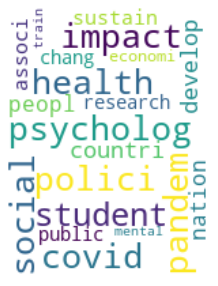

In [57]:
from wordcloud import WordCloud
text = dict(model_psy.show_topic(0, topn=20))
l=list(text.keys())
wordcloud = WordCloud(width=150, height=200,max_font_size=25, max_words=20, background_color="white").generate(" ".join(l))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('graph26.png')

In [58]:
# LSA Model

a=pd.DataFrame()

for i in range(number_of_topics):
    words_psy =dict(model_psy.show_topic(i, topn=words))
    b=pd.DataFrame(words_psy,index=[i])
    a=a.append(b)

a=a.transpose()

top_words = dict(model_psy.show_topic(0,topn=5))

df = pd.DataFrame(columns=list(top_words.keys()), 
                  index = list(top_words.keys()))

l = list(top_words.keys())
print('cosine-similarity')
for i in l:
    for j in l:
            matrix=np.array([a.loc[i],a.loc[j]])
            n = s.metrics.pairwise.cosine_similarity(matrix, matrix, dense_output=True)
            df.loc[[i],[j]] = n[0,1]
print(df)

dfi.export(df, 'df_styled29.png')

cosine-similarity
                 covid    psycholog       pandem       health      impact
covid                1 -0.000276921  0.000687186  -0.00207746  0.00235058
psycholog -0.000276921            1 -0.000841385 -0.000371215  0.00270809
pandem     0.000687186 -0.000841385            1  -0.00081868  0.00225275
health     -0.00207746 -0.000371215  -0.00081868            1 -0.00207182
impact      0.00235058   0.00270809   0.00225275  -0.00207182           1


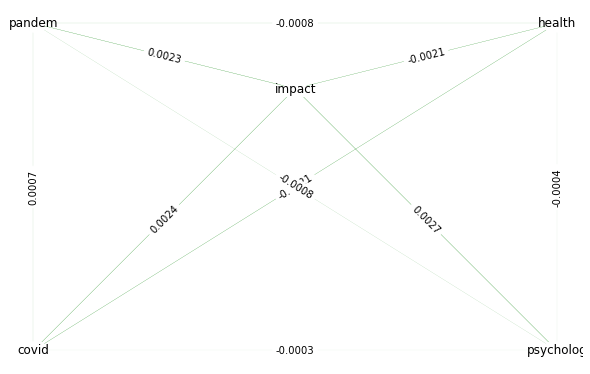

In [59]:
df = df.apply(pd.to_numeric, errors='coerce')

df=df.round(4)

l = list(top_words.keys())

df_adj = pd.DataFrame(df.to_numpy(), index=l, columns=l)
G = nx.from_pandas_adjacency(df)
pos = {l[0]: (0, 0),l[1]: (1, 0), l[2]: (0, 1), l[3]: (1, 1), l[4]: (0.5, 0.8)}
a=list(G.edges(data=True))

b=[]
for i in a:
    b.append(i[:][2]['weight'])
w = [x *100  for x in b]

colors = range(4)
nx.draw(G,pos, alpha=1, width=w, with_labels = True,node_size=200, edge_color='g',node_color='b')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos, nodelist=l, node_color="w")
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('fig29.png')

In [60]:
mantel_test()

Pairwise-distance
                 covid    psycholog    pandem    health    impact  \
covid      3.65002e-08     0.996591   1.36505   1.36389   1.00949   
psycholog     0.996591  8.23181e-11   0.93382  0.931383   0.22913   
pandem         1.36505      0.93382         0   1.32654  0.879823   
health         1.36389     0.931383   1.32654         0  0.922818   
impact         1.00949      0.22913  0.879823  0.922818         0   
imag           1.40774     0.994878   1.36172   1.36423   1.02013   
model          1.40739     0.994056   1.36263   1.36107   1.02422   
detect         1.39441     0.979018    1.3545   1.35587  0.997113   
volum          1.28667     0.819953   1.21162   1.23196  0.900518   

                  imag     model       detect     volum  
covid          1.40774   1.40739      1.39441   1.28667  
psycholog     0.994878  0.994056     0.979018  0.819953  
pandem         1.36172   1.36263       1.3545   1.21162  
health         1.36423   1.36107      1.35587   1.23196  
i

(-0.3627209191288955, 0.825, -1.083700980584604)

In [61]:
def mantel_test_verticle(model_a,model_b):
    words_science = dict(model_a.show_topic(0, topn=word_count_science))
    words_psy = dict(model_b.show_topic(0, topn=word_count_psy))

    top_words_science = dict(model_a.show_topic(0, topn=5)) 
    top_words_psy = dict(model_b.show_topic(0,topn=5)) 


    c={} #law words in non law
    for key in top_words_science:
        try:
            c[key] = words_psy[key]
        except KeyError:
            c[key] = 0

    top_words_psy.update(c)

    b={} #non law words in law
    for key in top_words_psy:
        try:
            b[key] = words_science[key]
        except KeyError:
            b[key] = 0

    b.update(top_words_science)
    top_words_science=b

    #pairwise distance for law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_science =dict(model_a.show_topic(i, topn=word_count_science))
        b=pd.DataFrame(words_from_science,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_science.keys()), 
                      index = list(top_words_science.keys()))

    l = list(top_words_science.keys())

    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df1 = df.to_numpy()
    #pairwise distace for non-law
    a=pd.DataFrame()

    for i in range(number_of_topics):
        words_from_psy =dict(model_b.show_topic(i, topn=word_count_psy))
        b=pd.DataFrame(words_from_psy,index=[i])
        a=a.append(b)

    a=a.transpose()

    df = pd.DataFrame(columns=list(top_words_psy.keys()), 
                      index = list(top_words_psy.keys()))

    l = list(top_words_psy.keys())
    print('Pairwise-distance')
    for i in l:
        for j in l:
            try:
                matrix=np.array([a.loc[i],a.loc[j]])
            except KeyError:
                matrix=np.zeros((2,3))
            n = s.metrics.pairwise.nan_euclidean_distances(matrix, matrix)
            df.loc[[i],[j]] = n[0,1]
    print(df)
    df2 = df.to_numpy()
    

    dist1 = list(df1[np.triu_indices(len(top_words_science), k = 1)])

    

    dist2 = list(df2[np.triu_indices(len(top_words_psy), k = 1)])

    return mantel.test(dist1, dist2, perms=10000, method='pearson', tail='upper')

In [62]:
mantel_test_verticle(model_science_articles,model_science_p)

Pairwise-distance
           support    granada    covid  research   programm         imag  \
support          0   0.293936  1.49554  0.484115   0.304814      1.70813   
granada   0.293936          0   1.5102  0.374956  0.0581495      1.65241   
covid      1.49554     1.5102        0      1.46    1.51455        2.148   
research  0.484115   0.374956     1.46         0   0.363973       1.6492   
programm  0.304814  0.0581495  1.51455  0.363973          0      1.64707   
imag       1.70813    1.65241    2.148    1.6492    1.64707  2.98023e-08   
model      1.69519    1.60395  2.14967   1.64875    1.60353      2.37785   
dataset    1.33806    1.28484  2.05044    1.2921      1.291      1.89663   
infect     1.42492    1.36522  1.97352   1.42808    1.35287      2.14775   

                model      dataset       infect  
support       1.69519      1.33806      1.42492  
granada       1.60395      1.28484      1.36522  
covid         2.14967      2.05044      1.97352  
research      1.64875

(0.1507933512760768, 0.3091, 0.575975284563342)

In [63]:
mantel_test_verticle(model_science_articles,model_science_paragraph)

Pairwise-distance
           covid         imag        model       detect        volum  \
covid          0        2.148      2.14967      1.55853      1.47999   
imag       2.148  2.98023e-08      2.37785      1.71421      1.64251   
model    2.14967      2.37785  2.98023e-08       1.6207       1.6226   
detect   1.55853      1.71421       1.6207  1.49012e-08     0.711539   
volum    1.47999      1.64251       1.6226     0.711539  5.26836e-09   
dataset  2.05044      1.89663      2.04991      1.44305      1.28109   
infect   1.97352      2.14775      1.98538      1.53513      1.23022   

             dataset       infect  
covid        2.05044      1.97352  
imag         1.89663      2.14775  
model        2.04991      1.98538  
detect       1.44305      1.53513  
volum        1.28109      1.23022  
dataset  2.10734e-08      2.03118  
infect       2.03118  2.10734e-08  
Pairwise-distance
               covid     imag        model       detect        volum  dataset  \
covid    2.10734e-

(0.7666586866692653, 0.004761904761904762, 1.9309724665249317)

In [64]:
mantel_test_verticle(model_science_p,model_science_paragraph)

Pairwise-distance
            covid     imag    model   detect volum   support  granada  \
covid           0  1.60718    2.676    2.676     0   4.44755  3.34914   
imag      1.60718        0  1.09614  1.09614     0   3.56952  2.37968   
model       2.676  1.09614        0        0     0   2.99493  1.88382   
detect      2.676  1.09614        0        0     0   2.99493  1.88382   
volum           0        0        0        0     0         0        0   
support   4.44755  3.56952  2.99493  2.99493     0         0  1.18984   
granada   3.34914  2.37968  1.88382  1.88382     0   1.18984        0   
research  3.85527  2.76062  2.07496  2.07496     0  0.941912  0.54807   
programm  3.85527  2.76062  2.07496  2.07496     0  0.941912  0.54807   

          research  programm  
covid      3.85527   3.85527  
imag       2.76062   2.76062  
model      2.07496   2.07496  
detect     2.07496   2.07496  
volum            0         0  
support   0.941912  0.941912  
granada    0.54807   0.54807  
res

(0.18428438552409593, 0.2865, 0.6729883496527418)

In [65]:
mantel_test_verticle(model_psy_articles,model_psy_p)

Pairwise-distance
             misinfodem    covid       articl    mechan   health      student  \
misinfodem  7.45058e-09  1.28761     0.710435  0.383949  1.47547      1.62483   
covid           1.28761        0      1.24313   1.22256  1.80086      1.93386   
articl         0.710435  1.24313  7.45058e-09  0.499765  1.39392      1.59767   
mechan         0.383949  1.22256     0.499765         0  1.41757      1.54828   
health          1.47547  1.80086      1.39392   1.41757        0      2.19624   
student         1.62483  1.93386      1.59767   1.54828  2.19624  4.21468e-08   
psycholog       1.28894  1.53573      1.08759   1.15709  1.64301      1.86423   
train           1.13003  1.60639      1.19265   1.04422  1.77466       1.7649   
pandem          1.00041  1.27753     0.819701  0.847953  1.35103      1.71342   

              psycholog    train    pandem  
misinfodem      1.28894  1.13003   1.00041  
covid           1.53573  1.60639   1.27753  
articl          1.08759  1.19265  0.

(-0.4858690481975701, 0.9388, -1.6201815245052849)

In [66]:
mantel_test_verticle(model_psy_articles,model_psy_paragraph)

Pairwise-distance
             covid    psycholog    pandem   health       impact      student  \
covid            0      1.53573   1.27753  1.80086       1.2555      1.93386   
psycholog  1.53573  2.98023e-08   1.29896  1.64301      1.20951      1.86423   
pandem     1.27753      1.29896         0  1.35103     0.831329      1.71342   
health     1.80086      1.64301   1.35103        0      1.57289      2.19624   
impact      1.2555      1.20951  0.831329  1.57289  1.49012e-08      1.76763   
student    1.93386      1.86423   1.71342  2.19624      1.76763  4.21468e-08   
train      1.60639       1.4133    1.1752  1.77466      1.22636       1.7649   

             train  
covid      1.60639  
psycholog   1.4133  
pandem      1.1752  
health     1.77466  
impact     1.22636  
student     1.7649  
train            0  
Pairwise-distance
                 covid psycholog       pandem   health       impact  student  \
covid      1.49012e-08   1.40569      1.40801  1.40128      1.39238  1.4063

(0.23856482536713894, 0.30337301587301585, 0.6011482034943305)

In [67]:
mantel_test_verticle(model_psy_p,model_psy_paragraph)

Pairwise-distance
              covid psycholog       pandem   health    impact misinfodem  \
covid             0   1.70328      2.70574  1.67187     2.236    1.35287   
psycholog   1.70328         0      2.52328  1.35447  0.901913    2.58051   
pandem      2.70574   2.52328  2.63418e-08  1.22885   1.89336    4.05861   
health      1.67187   1.35447      1.22885        0    1.0317    2.98805   
impact        2.236  0.901913      1.89336   1.0317         0    3.34632   
misinfodem  1.35287   2.58051      4.05861  2.98805   3.34632          0   
articl      1.13552  0.567759       2.4577  1.22885   1.25066    2.09875   
mechan      1.67187   1.35447      1.22885        0    1.0317    2.98805   

              articl   mechan  
covid        1.13552  1.67187  
psycholog   0.567759  1.35447  
pandem        2.4577  1.22885  
health       1.22885        0  
impact       1.25066   1.0317  
misinfodem   2.09875  2.98805  
articl             0  1.22885  
mechan       1.22885        0  
Pairwise-

(-0.25881416094530124, 0.762, -0.872180118128978)